In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import scipy.spatial as scisp
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [18]:
zip2vec = np.load("zip2vec.npy")
indices = np.load("indices.npy")
zipcodes = np.load("zipcodes.npy")

In [19]:
zip2idx = {z : i for z, i in zip(zipcodes, indices)}
idx2zip = {i : z for i, z in zip(indices, zipcodes)}

In [20]:
data = pd.read_csv("data2.csv", index_col = 0)

C:\ProgramData\Anaconda3\envs\fuck\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [21]:
append0 = np.vectorize(lambda x : str(x) if len(str(x)) == 5 else "0" + str(x))
data["zip"] = append0(data["zip"])

In [22]:
large_city_zip = data[data["city scale"] == "large"]["zip"].unique()
large_city_idx = [zip2idx[z] for z in large_city_zip]
large_city_vec = zip2vec[large_city_idx]

In [23]:
med_city_zip = data[data["city scale"] == "medium"]["zip"].unique()
med_city_idx = [zip2idx[z] for z in med_city_zip]
med_city_vec = zip2vec[med_city_idx]

In [24]:
small_city_zip = data[data["city scale"] == "small"]["zip"].unique()
small_city_idx = [zip2idx[z] for z in small_city_zip]
small_city_vec = zip2vec[small_city_idx]

In [25]:
tiny_city_zip = data[data["city scale"] == "tiny"]["zip"].unique()
tiny_city_idx = [zip2idx[z] for z in tiny_city_zip]
tiny_city_vec = tiny_city_vec = zip2vec[tiny_city_idx]

Text(0, 0.5, 'Second Principle Component')

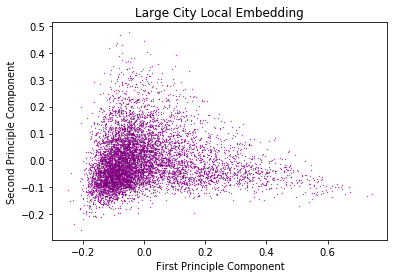

In [26]:
pca = PCA(n_components=2)
pca.fit(large_city_vec)
x, y = pca.transform(large_city_vec)[:, 0], pca.transform(large_city_vec)[:, 1]
plt.scatter(x, y, s = 0.1, c = "purple")
plt.title("Large City Local Embedding")
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

Text(0, 0.5, 'Second Principle Component')

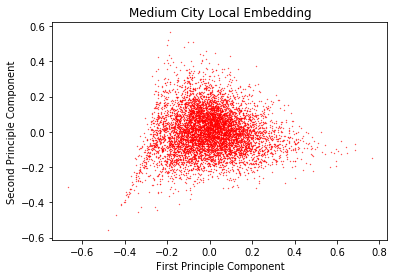

In [27]:
pca = PCA(n_components=2)
pca.fit(med_city_vec)
x, y = pca.transform(med_city_vec)[:, 0], pca.transform(med_city_vec)[:, 1]
# x_max = np.argmax(x)
# y_max = np.argmax(y)

plt.scatter(x, y, s = 0.1, c = "red")
plt.title("Medium City Local Embedding")
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

Text(0, 0.5, 'Second Principle Component')

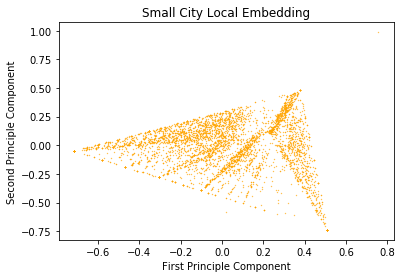

In [28]:
pca = PCA(n_components=2)
pca.fit(small_city_vec)
x, y = pca.transform(small_city_vec)[:, 0], pca.transform(small_city_vec)[:, 1]
plt.scatter(x, y, s = 0.1, c = "orange")
plt.title("Small City Local Embedding")
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")


In [ ]:
pca = PCA(n_components=2)
pca.fit(tiny_city_vec)
x, y = pca.transform(tiny_city_vec)[:, 0], pca.transform(tiny_city_vec)[:, 1]
x[972] = -17.0
plt.scatter(x, y, s = 1, c = "yellow")
plt.title("Tiny City Local Embedding")
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

In [29]:
temp = data[data["scale"] == "Total"]
temp = temp[temp["level"] == 1]["ESTAB"]
# # plt.hist(temp)
dist = dict(temp.value_counts())
l = sorted(dist.items(), key = lambda x : x[0])
num = [pair[0] for pair in l]
count = [pair[1] for pair in l]

# print(np.array(dist.values))
# count
y = np.cumsum(count)
cdf = y / y[-1]


#### Equal Breath Binning
## 25 th percentile 
num=np.array(num)
per_25 = 3
## 50 th percentile
per_50 = num[abs(cdf - 0.50) < 0.003][0]

## 75 th percentile
per_75 = num[abs(cdf - 0.75) < 0.001][0]




temp = data[data["scale"] == "Total"]
temp = temp[temp["level"] == 1]
scale_labeling = np.vectorize(lambda x : "tiny" if x <= per_25 else ("small" if x <= per_50 else ("medium" if x < per_75 else "large")))
scale = scale_labeling(temp["ESTAB"])
zips = temp["zip"]
zip2scale = {z : s for z, s in zip(zips, scale)}

In [30]:
# color_arr = []
scale = [zip2scale[idx2zip[i]] for i in range(len(idx2zip))]
choose_color = np.vectorize(lambda x : "yellow" if x == "tiny" else("orange" if x == "small"
                                                               else ("red" if x == "medium" else "purple")))
colors = choose_color(scale)

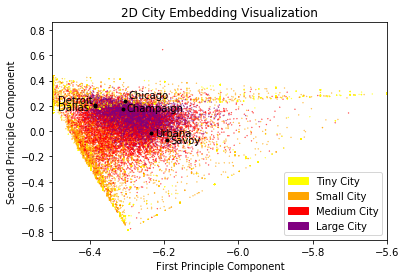

In [75]:
##### pca = PCA(n_components=2)
pca.fit(zip2vec)
x, y = pca.transform(zip2vec)[:, 0], pca.transform(zip2vec)[:, 1]

x[3240] = -3.20
y[3240]
plt.scatter(x, y, s = 0.1, c=colors)
plt.xlim(-6.5, -5.6)
plt.title("2D City Embedding Visualization")
yellow_patch = mpatches.Patch(color='yellow', label='Tiny City')
orange_patch = mpatches.Patch(color="orange", label="Small City")
red_patch = mpatches.Patch(color='red', label='Medium City')
purple_patch = mpatches.Patch(color='purple', label='Large City')
plt.legend(handles=[yellow_patch, orange_patch,red_patch, purple_patch])
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.plot(x[9262], y[9262], marker='o', markersize=3, color="black")
plt.text(x[9262] + 0.01, y[9262] + 0.02, s = "Chicago")
plt.plot(x[9671], y[9671], marker='o', markersize=3, color="black")
plt.text(x[9671] + 0.01, y[9671] - 0.02, s = "Champaign")
plt.plot(x[9665], y[9665], marker='o', markersize=3, color="black")
plt.text(x[9665] + 0.01, y[9665] - 0.02, s = "Urbana")
plt.plot(x[9700], y[9700], marker='o', markersize=3, color="black")
plt.text(x[9700] + 0.01, y[9700] - 0.02, s = "Savoy")
plt.plot(x[13373], y[13373], marker='o', markersize=3, color="black")
plt.text(x[13373] - 0.1, y[13373] + 0.02, s = "Detroit")
plt.plot(x[26395], y[26395], marker='o', markersize=3, color="black")
plt.text(x[26395] - 0.1, y[26395] - 0.04, s = "Dallas")
plt.savefig("2d_pca.png")

In [32]:
zip2vec

array([[0.08247401, 0.08247401, 0.07474208, ..., 0.14432952, 0.14432952,
        0.04123701],
       [0.07142836, 0.10416636, 0.03571418, ..., 0.01190473, 0.19047562,
        0.09226163],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99950025],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99987502],
       [0.11155334, 0.11155334, 0.05179262, ..., 0.03585643, 0.15139382,
        0.07968096]])

In [ ]:
data['']

In [33]:
data[:5]

,zip,NAICS.id,NAICS.display-label,RCPSZFE.display-label,ESTAB,City Name,State,level,weight,scale,city scale
0,06001,44-45,Retail trade,All establishments,81,Avon,CT,1,0,Total,large
1,06001,44-45,Retail trade,Establishments operated entire year with sales...,4,Avon,CT,1,1,D,large
2,06001,44-45,Retail trade,Establishments operated entire year with sales...,8,Avon,CT,1,2,C,large
3,06001,44-45,Retail trade,Establishments operated entire year with sales...,20,Avon,CT,1,4,B,large
4,06001,44-45,Retail trade,Establishments operated entire year with sales...,36,Avon,CT,1,8,A,large


In [46]:
data['zip'].unique().tolist().index('61801')

9665

In [37]:
data['zip'].unique().tolist()[3240]

'85073'

In [96]:
zipcodes[49701]

'91423'

In [71]:
zipcodes.tolist().index('61820')

9671

In [ ]:
pca = PCA(n_components=2)
pca.fit(large_cities_vec)

In [ ]:
x, y = pca.transform(zip2vec)[:, 0], pca.transform(zip2vec)[:, 1]

In [ ]:
# np.argmin(x)
# np.min(x)
# x[3240] = -0.8
# np.argmin(y)
y[3240] = -1

In [ ]:
plt.scatter(x, y, s = 0.01)
plt.xlim(-1, 1)
plt.ylim(-0.75, 0.75)

<BarContainer object of 12 artists>

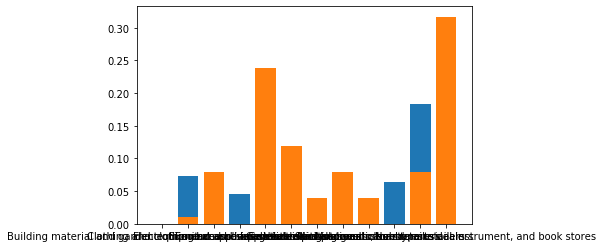

In [78]:
objects = ('Building material and garden equipment and supplies dealers',
 'Clothing and clothing accessories stores',
 'Electronics and appliance stores',
 'Food and beverage stores',
 'Furniture and home furnishings stores',
 'Gasoline stations',
 'General merchandise stores',
 'Health and personal care stores',
 'Miscellaneous store retailers',
 'Motor vehicle and parts dealers',
 'Nonstore retailers',
 'Sporting goods, hobby, musical instrument, and book stores')
y_pos = np.arange(len(objects))
plt.bar(objects, zip2vec[9665])
plt.bar(objects, zip2vec[9700])

Text(0.5, 1.0, 'industry proportion of Urbana (Blue) and Savoy (Orange)')

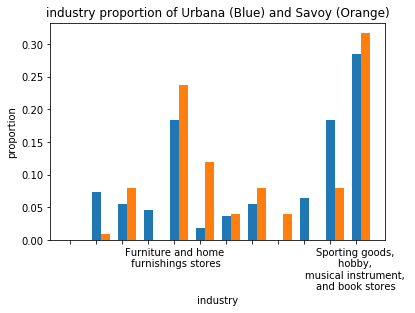

In [92]:
objects = ('',
 '',
 '',
 '',
 'Furniture and home\n furnishings stores',
 '',
 '',
 '',
 '',
 '',
 '',
 'Sporting goods, \nhobby, \nmusical instrument, \nand book stores')
y_pos = np.arange(len(objects))

fig, ax = plt.subplots()

width = 0.35         # the width of the bars
p1 = ax.bar(y_pos - width, zip2vec[9665], width, bottom=0, tick_label = objects)
p2 = ax.bar(y_pos, zip2vec[9700], width, bottom=0)
plt.xlabel("industry")
plt.ylabel("proportion")
plt.title("industry proportion of Urbana (Blue) and Savoy (Orange)")

In [ ]:
# zip2vec
